# <center>Zajęcia nr 7 </center>
## <center>Wykresy i wizualizacja danych w Pythonie</center>

In [92]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Tryby wyświetlania:
* **inline** - statyczne obrazki w wyjściach w notatniku
* notebook - interaktywne obrazy (uwaga: należy dodawać `plt.show` by pokazać obraz)
* qt
* i inne


In [77]:
%matplotlib inline
%config InlineBackend.figure_format='svg'


Tryby interfejsu:
* **obiektowy**
* Matlabowy (pyplot)


Dwie ważne klasy: ```Figure``` (kanwa obrazka) i ```Axes``` (umieszczony na kanwie układ odniesienia wykresu). Rysowanie różnych wykresów to metody klasy ```Axes```.

Dodajemy fragment z układem odniesienia do obrazka fig. Podajemy wpółrzędne (lewy,dół,szerokość,wysokość) w proporcjach do całego fig

Sporządzanie kolejnych wykresów dodaje je do wspólnego rysunku. Możemy wyczyścić zarówno ```figure``` jak i ```axes``` (np. ```ax1.clear()```). Możemy także usuwać pojedyncze układy współrzędnych `fig.delaxes()`.

Obrazek (figure) i umieszczoną w nim siatkę układów odniesienia (axes) można wygenerować jednym poleceniem

Wykresy można ubogacać o osie, tytuły, legendę itd. (co tylko się zapragnie).

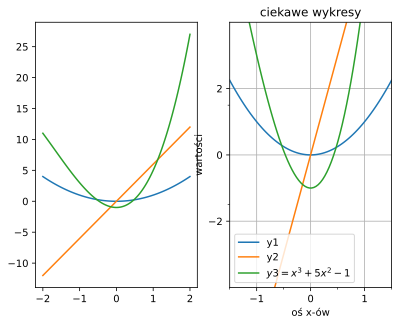

In [87]:
fig2, (ax21,ax22) = plt.subplots(1,2)
ax21.clear()
ax22.clear()

x=np.linspace(-2,2,100)
y1=x**2
y2=6*x
y3=x**3+5*x**2-1
ax21.plot(x,y1)
ax21.plot(x,y2)
ax21.plot(x,y3)
#------------------------teraz wersja ulepszona
ax22.plot(x,y1,label='y1')
ax22.plot(x,y2,label='y2')
ax22.plot(x,y3,label='$y3=x^3+5x^2-1$')
ax22.legend()

#Dodawanie opisów osi i rysunku (na dwa sposoby)
#ax22.set_xlabel('oś x-ów')
#ax22.set_ylabel('wartości')
#ax22.set_title('ciekawe wykresy')
ax22.set(xlabel='oś x-ów', ylabel='wartości', title='ciekawe wykresy')

#Określanie limitów osi
ax22.axis([-1.5,1.5,-4,4]) #albo ax22.set_xlim(-1.5,1.5)

#Określanie podziałek na osiach i dodanie kraty
ax22.set_xticks([-1,0,1])
ax22.set_yticks([0,2,-2])
ax22.set_yticks([0,1.5,-1.5], minor=True)
ax22.xaxis.set_minor_locator(mpl.ticker.MaxNLocator(6)) #automatyczne utworzenie drobniejszych podziałek które domyślnie nie generują gridu
ax22.grid()
#fig2.tight_layout()

plt.subplots_adjust(hspace=0)

**Uwaga** każdy obrazek możemy zapisać przez metodę `.savefig()`

### Ważne metody obiektów klasy Axes
https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.legend.html

* Axes.legend() - umieszcza w układzie współrzędnych obiekt klasy Legend; wcześniej wypełnia się legendę dodając parametry `label`
* Axes.set_xlabel - opis osi x
* Axes.set_xticks - podziałka osi x
* Axes.set_xlim - zakres osi x



### Najważniejsze parametry

nazwa argumentu |  wartości | opis
--- |--- |---
color | nawa angielska lub kod RGB | kolor linii
alpha | float z zakresu [0,1] | przezroczystość
linewidth lub lw | float | grubośc linii
linestyle lub ls | '-', '--', ':', '.-' | sposób tworzenia linii
marker | '+', 'o', 's', '.' | styl punktu danych

### Najważniejsze typy wykresów dla danych 1D:

* liniowy lub znacznikowy ```ax.plot```
* punktowy ```ax.scatter``` (każdy punkt ma indywidualne własności)
* słupkowy ```ax.bar```
* histogram ```ax.hist```
* wykres kołowy `ax.pie`
* wykres błędów `ax.errorbar`

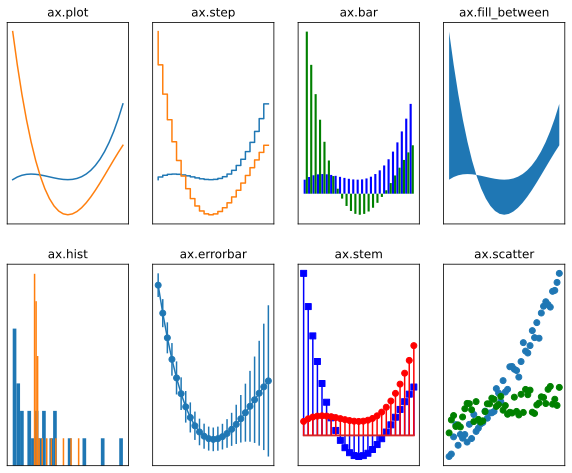

In [94]:
#funkcja pomocnicza
def hide_labels(fig, ax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.axis('tight')

fig,ax=plt.subplots(2,4,figsize=(10,8))
ax=ax.flatten()


x = np.linspace(-3, 3, 25)
y1 = x**3+ 3 * x**2 + 10
y2 = -1.5 * x**3 + 10*x**2 - 15

#liniowy
ax[0].plot(x, y1)
ax[0].plot(x, y2)
ax[0].set_title('ax.plot')


#schodkowy
ax[1].step(x, y1)
ax[1].step(x, y2)
ax[1].set_title('ax.step')

#słupkowy
width = 6/50.0
ax[2].bar(x - width/2, y1, width=width, color="blue")
ax[2].bar(x + width/2, y2, width=width, color="green")
ax[2].set_title('ax.bar')

#wypełnienie
ax[3].fill_between(x, y1, y2)
ax[3].set_title('ax.fill_between')

#histogram
ax[4].hist(y2, bins=30)
ax[4].hist(y1, bins=30)
ax[4].set_title('ax.hist')

#error
ax[5].errorbar(x, y2, yerr=y1, fmt='o-')
ax[5].set_title('ax.errorbar')

#stem
ax[6].stem(x, y2, 'b', markerfmt='bs')
ax[6].stem(x, y1, 'r', markerfmt='ro')
ax[6].set_title('ax.stem')

#punktowy
x = np.linspace(0, 5, 50)

ax[7].scatter(x, -1 + x + 0.25 * x**2 + 2 * np.random.rand(len(x)))
ax[7].scatter(x, np.sqrt(x) + 2 * np.random.rand(len(x)), color="green")
ax[7].set_title('ax.scatter')

for i in range(8):
    hide_labels(fig,ax[i])

#### Wykresy liniowe

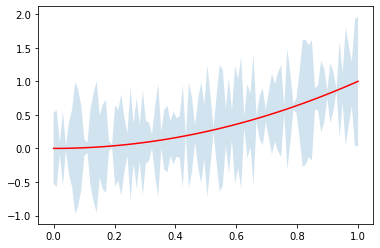

In [184]:
fig,ax=plt.subplots()
error=np.random.random(100)
x=np.linspace(0,1,100)
y=x**2
ax.plot(x,y,color='red')
ax.fill_between(x,y-error,y+error,alpha=0.2)

#### Punktowe

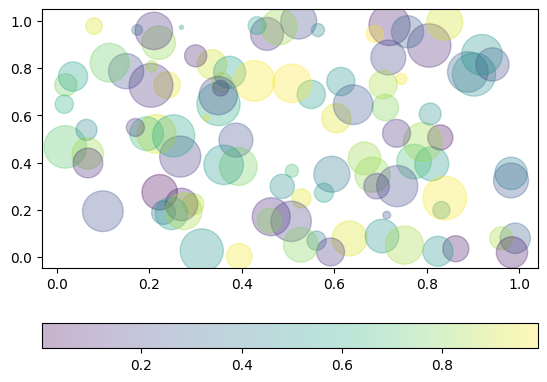

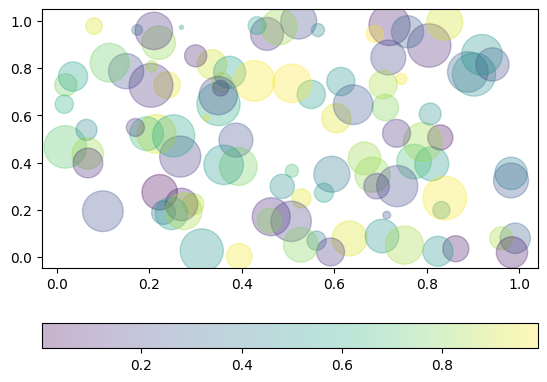

In [112]:
fig3,ax3=plt.subplots()
x = np.random.random(100)
y = np.random.random(100)
colors = np.random.random(100)
sizes = 1000 * np.random.random(100)

image=ax3.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
fig3.colorbar(image,orientation = 'horizontal')
fig3

z

In [115]:
fig3.savefig('obraz.svg')

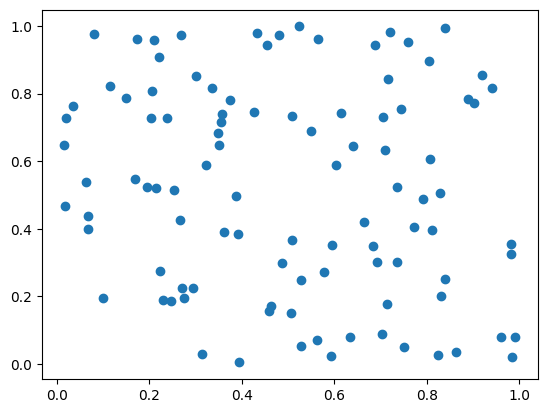

In [116]:
fig,ax=plt.subplots()
ax.plot(x,y,'o')

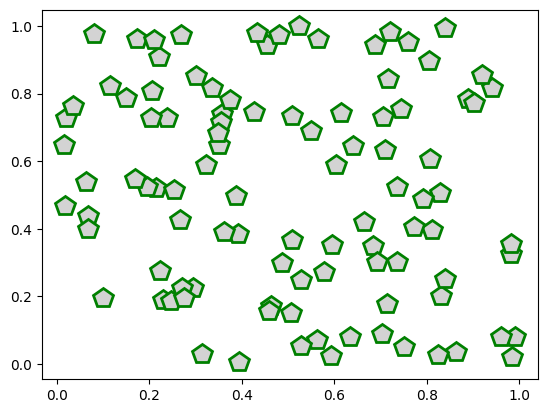

In [117]:
fig,ax=plt.subplots()
ax.plot(x, y, 'p',
         markersize=15, linewidth=4,
         markerfacecolor='lightgray',
         markeredgecolor='green',
         markeredgewidth=2)

### Zadanie 1
Narysuj wykres funkcji $x^3-4x^2+3x-4$ na odcinku $[-1,4]$ niebieską przerywaną linią. Znajdź (wykorzystując poznane dotychczas metody) lokalne maksima i minima tej funkcji na $(-1,4)$ i zaznacz je na rysunku - maksima jako zielone kółka, a minima jako czerwone krzyżyki.

Ustaw podziałki osi x co 0.5, a etykiety co 2.

### Zadanie 2
Narysuj okrąg jednostkowy.

#### Słupkowe/histogramy

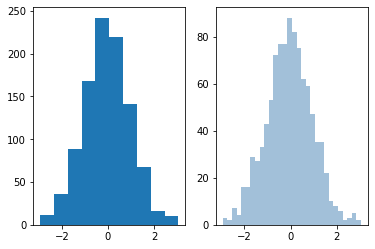

In [194]:
data = np.random.randn(1000) #próbka z rozkładu normalnego
data2=np.random.random(1000)
fig,ax=plt.subplots(1,2)
ax[0].hist(data)
ax[1].hist(data, bins=30, alpha=0.5,
         color='steelblue',
         edgecolor='none');

<BarContainer object of 4 artists>

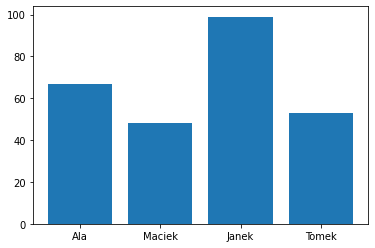

In [226]:
fig,ax=plt.subplots()
uczniowie=['Ala','Maciek','Janek','Tomek']
wyniki=[67,48,99,53]
ax.bar(uczniowie,wyniki)

### Zadanie 3
Dana jest lista województw i odpowiadająca im lista liczb zrealizowanych w 100% bonów turystycznych. Zaprezetuj te dane na wykresie, w taki sposób, by województwa z ponad 200 tyś zrealizowanych bonów były wyróżnione kolorystycznie.

In [103]:
wojewodztwa=['POMORSKIE',
 'ŚWIĘTOKRZYSKIE',
 'LUBELSKIE',
 'LUBUSKIE',
 'ŁÓDZKIE',
 'PODLASKIE',
 'DOLNOŚLĄSKIE',
 'MAŁOPOLSKIE',
 'MAZOWIECKIE',
 'PODKARPACKIE',
 'KUJAWSKO-POMORSKIE',
 'WIELKOPOLSKIE',
 'OPOLSKIE',
 'ZACHODNIOPOMORSKIE',
 'ŚLĄSKIE',
 'WARMIŃSKO-MAZURSKIE']
bony=[191320,
 73379,
 129772,
 75687,
 174206,
 75790,
 224318,
 253419,
 440041,
 136017,
 150566,
 307406,
 60889,
 111441,
 341697,
 94510]

## Wykresy 2D danych wielowymiarowych 
* ```plt.quiver``` - strzałki, pole wektorowe $f:R^2\to R^2$
* ```plt.contour``` - wykres konturowy, poziomice funkcji $f:R^2\to R$
* ```plt.contourf``` - z wypełnieniem
* ```plt.imshow``` - wykres jako obrazek

(-2.0, 2.0, -2.0, 2.0)

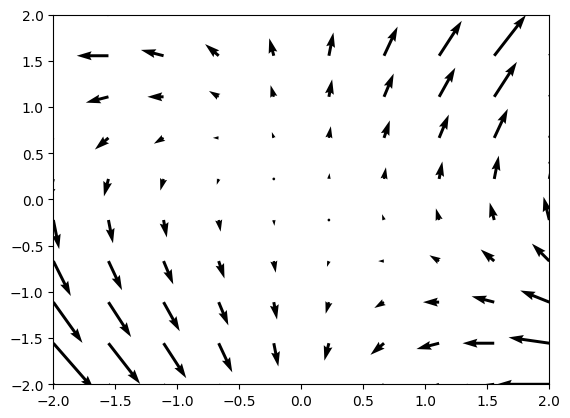

In [119]:
#quiver
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x, y)
fig,ax=plt.subplots()
ax.quiver(X,Y,X*Y,X+Y)
ax.axis([-2,2,-2,2])

### Zadanie 4
Narysuj wykres pola wektorowego $F(x,y)=(1-x^2+y,1+x+y^2)$ na obszarze $K=[-3,3]\times[-3,3]$.

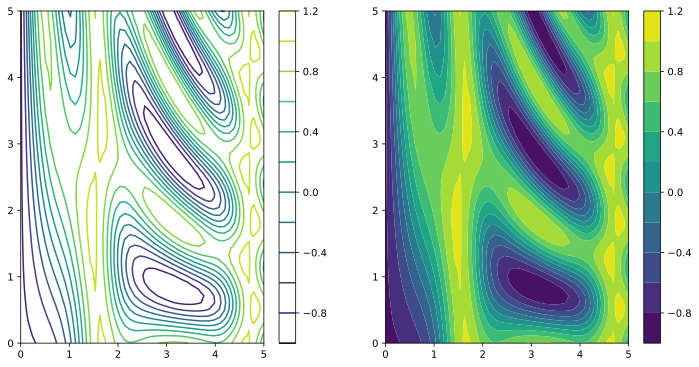

In [109]:
#contour
fig,ax=plt.subplots(1,2,figsize=(12,6))
def f(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
x = np.linspace(0, 5, 50)
y = np.linspace(0,5, 50)
X, Y = np.meshgrid(x, y)

im=ax[0].contour(X,Y,f(X,Y),10)
fig.colorbar(im)

im=ax[1].contourf(X,Y,f(X,Y),10)
fig.colorbar(im)

## Obrazy jako wykresy
Dowolna 2-wymiarowa tablica numpy może zostać narysowana za pomocą `ax.imshow`. Parametr `cmap` określa skalę kolorów przypisywanych wartościom z tablicy. 

**Uwaga:** układ współrzędnych zmienia się na zgody z tablicą, czyli od górnego lewego rogu.


### Zadanie 5
Narysuj czarno-białą szachownicę 8x8 z czarnym polem w lewym dolnym rogu. Usuń oznaczenia osi. Umieść krzyżyki na białej przekątnej.

## Wykresy 3D

```python
from mpl_toolkits import mplot3d
fig=plt.figure()
ax1=fig.add_subplot(projection='3d')
```
* ```Axes3D.plot```(x,y,z)
* ```Axes3D.scatter```
* ```Axes3D.bar3D``` (listy <płaskie> współrzędnych)
* ```Axes3D.contour3D``` - rysuje poziomice (siatka punktów, wartości, tzn. 2D,2D,2D)
* ```Axes3D.plot_surface``` - rysuje całą powierzcjnie (siatka punktów, wartości)
* ```Axes3d.plot_wireframe``` - rysuje siatkę zamiast pełnej powierzchni (siatka punktów, wartości)
 

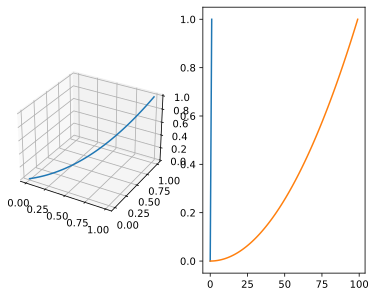

In [96]:
x=np.linspace(0,1,100)
y=np.linspace(0,1,100)
z=x*y
fig=plt.figure()
ax1=fig.add_subplot(121,projection='3d')
ax1.plot(x,y,z)
ax2=fig.add_subplot(122) #tu już zywkła projekcja, nie 3d
ax2.plot(x,y,z)

Do tworzenia wykresów powierzchni potrzebuejmy argumentów funkcji w postaci siatki `meshgrid`.

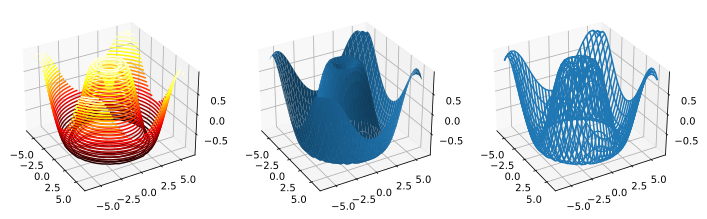

In [106]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4), subplot_kw={'projection': '3d'})

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
ax[0].contour3D(X, Y, Z, 30, cmap='hot')
ax[0].view_init(elev=30., azim=-30)

ax[1].plot_surface(X, Y, Z)
ax[1].view_init(elev=30., azim=-30)

ax[2].plot_wireframe(X, Y, Z)
ax[2].view_init(elev=30., azim=-30)

### Zadanie 6
Narysuj hiperboloidę okresową (3D).

### Zadanie dodatkowe
Wygeneruj (tj. wybierz lub wylosuj) $100$ punktów z kraty liczba całkowitych $\{0,1,\ldots,10\}^3$. Dla każdego z nich wylosuj wartość rzeczywistą z przedziału $[0,5]$. 
<ol type="a">
  <li>Narysuj punkty w przestrzeni 3D z kolorami zależnymi od wartości w tych punktach.</li>
  <li>Policz sumę wartości wszystkich punktów o pierwszych dwóch współrzędnych (i,j) (tzn. stwórz tablicę takich wartości). Zaprezenruj otrzymane rezultaty na wykresie.</li>
</ol>

## Zadanie domowe
Stwórz taki obrazek jak poniżej i nadaj mu tytuł oznaczając imieniem i nazwiskiem. Są na nim wykresy funkcji $y(x)=x^3+5x^2+10$ oraz jej pierwszej i drugiej pochodnej. Im dokładniej odwzorowany obrazek tym lepiej (więcej punktów).
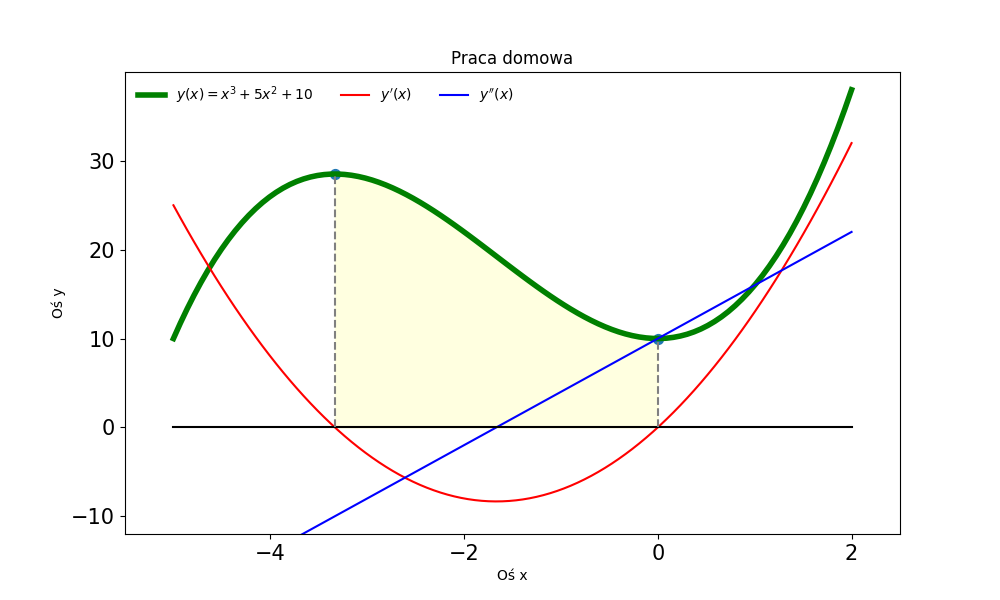